# Python Revision 1 #

The aim of this lab is to revise some basics of Python programming. We'll also introduce a few useful syntactic features. And you'll also have plenty of chance to practice working within a Jupyter notebook.



# Jupyter #

Jupyter notebooks are a user-friendly way of running snippets of code and displaying text or graphical results: it's easy to edit your code or to share the results. They are a very convenient way to do initial exploration of a data set or algorithm, although they are not necessarily the best way of running a completed program. 

The editable boxes you can type code into are called cells. To evaluate a cell, simply make sure that the cursor is in the cell (you may need to double-click it) then press Shift + Enter. As an example, **enter a simple arithmetic operation, say 2 + 2, into the cell below, and evaluate it**:

In [10]:
2+2

4

You will see that this cell now has a number, like In [1], so that you can refer back to it. Jupyter will display the result of the final calculation in a cell: the output from this one, Out[1]: 4, will now be displayed beneath it. And your cursor will have been moved forward to the next cell.

(You can also type Ctrl + Enter to run the cell and keep the cursor inside it – perhaps for more editing – or Alt + Enter to run the cell and insert a new one beneath it. These and many other commands can be found in the command palette by clicking the keyboard icon at the top of the page.)

You can type more than a single line into a cell. For instance, consider the simple program below. Evaluate this cell:

In [11]:
v = 10.0 
t = 10.0 

s = v*t

print(s)

100.0


Note that we didn't have to declare the variables v, t, or s in advance: these "labels" are simply created for us by Python when we start using them.
Now choose a different t, say t = 20. **Edit the cell above, evaluate it, and confirm that the program prints the correct answer 200**.


# Functions #

Recall that in Python we can wrap up any piece of code, especially if we might want to re-use it, into a function. To do this we use the keyword def. As an example, let's turn the simple program above into a function. **Evaluate the cell below**:



In [12]:
def distance(t, v = 10.0):
    s = v*t 
    return s

# Returning values vs printing output #

Jupyter notebooks have the useful function that they automatically print out the value of the last expression in a cell. So when you evaluated distance(10), Jupyter printed out the value of the distance it calculated. You might think it would be equally acceptable to write a function that explicitly prints the value it calculates, something like the following:


In [13]:
def distance_wrong(t, v = 10.0):
    """Prints the answer rather than returning it, which is a coding mistake!"""
    s = v*t
    print(s)

Now distance_wrong(10) should give output that looks very similar to distance(10). **Check this**.


In [14]:
distance_wrong(5,10)

50


In [15]:
distance(5,10)

50

But this version is not nearly as useful if we want to do anything further with the results of our calculation. **Evaluate the following cells. Can you explain why the first version works and the "wrong" one doesn't?**


In [16]:
500 - distance(10)

400.0

In [17]:
500 - distance_wrong(10)

100.0


TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

# Visualisation #

Modern computers have made visualisation so easy that it should be the first step of almost any data analysis: it is far easier to see what is going on from a picture than from, say, a table of numbers.
We will use the matplotlib package to make pictures, which plays very nicely with Jupyter notebooks. In fact in this lab we will specifically be using the pyplot submodule: this is designed to behave similarly to MATLAB plotting, and contains all the functionality we will need for now.  We need to import pyplot functions


In [18]:
import matplotlib.pyplot as plt

Let's make a plot of cos(x)

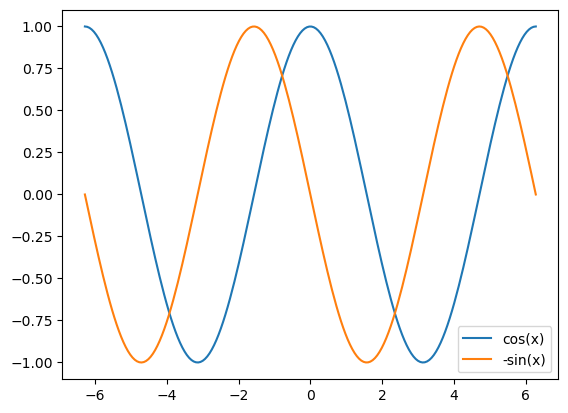

In [21]:
import numpy as np

x = np.linspace(-2*np.pi, 2*np.pi, 200)
y = np.cos(x)
z= -np.sin(x)
plt.figure()
plt.plot(x,y,label='cos(x)')
plt.plot(x,z, label= '-sin(x)')
plt.legend()


**Now add a second line on the same plot with the derivative of cos(x) and a legend with both lines labelled (google matplotlib legend if you forgot how to do this)**

# List Comprehensions #

A nice feature of python is the ability to do list comprehensions.  Let's say I have a list of numbers and I want to calculate the square root of each:

In [22]:
my_list = [1,4,9,16,25]
my_roots = [np.sqrt(x) for x in my_list]
print(my_roots)

[np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0)]


This expression takes each element, x, in my_list and applies np.sqrt() to it, returning a new list.  **Now use a list comprehension to apply 2x+1 to the numbers 1 to 100**. 

In [23]:
my_list1= range(1,101)
func=[2*x+1 for x in my_list1]
print(func)


[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201]


**On a new figure, make a plot of your results**


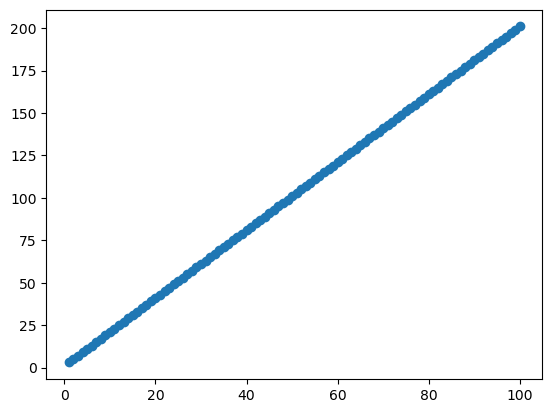

In [25]:
plt.scatter(x=my_list1, y=func)
plt.show()

# Functional Programming #

Python also supports the use of lambda or anonymous functions.  This can come in handy.  Let's say we have a function that takes another function as an arguement:

In [26]:
def derivative(derivative_function, values):
    return [derivative_function(x) for x in values]

and let's say our function is $x^2$, so the derivative is $2x$

In [27]:
def my_deriv_func(x):
    return 2*x

Now I can pass my function and some values to derivative:

In [28]:
xs = np.arange(1,10,1)
ys = derivative(my_deriv_func,xs)
print(ys)

[np.int64(2), np.int64(4), np.int64(6), np.int64(8), np.int64(10), np.int64(12), np.int64(14), np.int64(16), np.int64(18)]


Now, this was a lot of typing for something that only needed to be a list comprehension!  In this simple example you actually would just want to use a list comprehension, but in more complicated cases you could avoid explicitely defining my_deriv_func with the use of a lambda function as follows:

In [29]:
ys_2 = derivative(lambda x: 2*x, xs)
print(ys_2)

[np.int64(2), np.int64(4), np.int64(6), np.int64(8), np.int64(10), np.int64(12), np.int64(14), np.int64(16), np.int64(18)]


**Using lambda functions, make $x^2$ and $x^3$ for the xs.  Plot your results.**

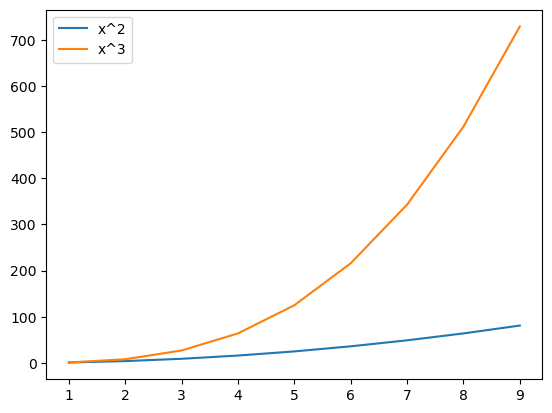

In [32]:

y1=derivative(lambda x:x**2,xs)
y2=derivative(lambda x:x**3,xs)

plt.plot(xs, y1, label='x^2')
plt.plot(xs, y2,label='x^3')
plt.legend()
plt.show()
